In [1]:
# import libraries
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# import the dataset
dataset = pd.read_csv('penguins.csv')
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
# check for missing values
dataset.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [90]:
# check for missing values
dataset.isnull().mean()

species              0.000000
island               0.000000
bill_length_mm       0.005814
bill_depth_mm        0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
sex                  0.031977
dtype: float64

In [5]:
data_clean = dataset.dropna(subset='sex')
data_clean.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
# identify data types from dataframe
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [7]:
# group data by numerical and categorical variables
df_num = data_clean.select_dtypes(include=['float64'])
df_cat = data_clean.select_dtypes(include=['object'])

<Figure size 1000x800 with 0 Axes>

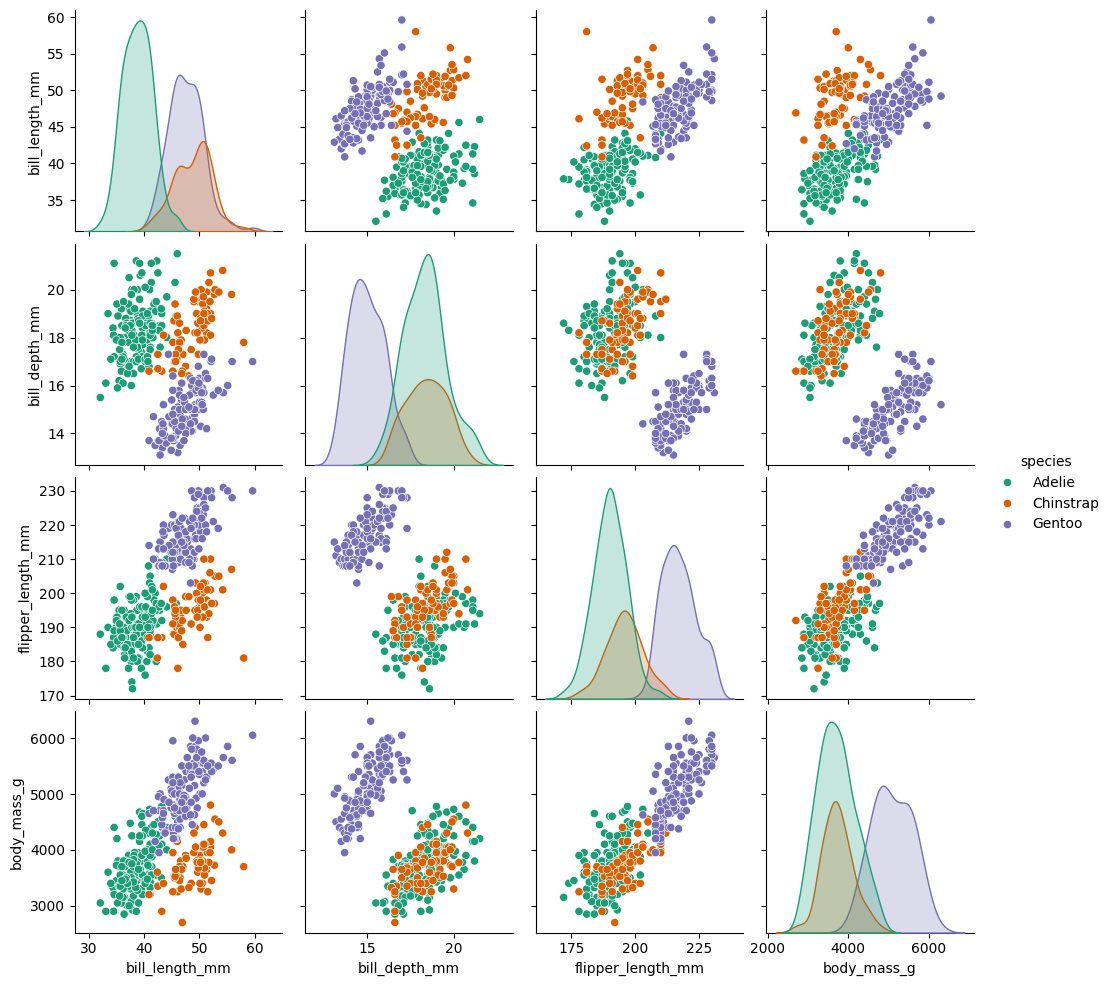

In [10]:
# pair plot of numerical variables
plt.figure(figsize=(10,8))
sns.pairplot(data_clean, hue= 'species', palette='Dark2')
plt.show();

In [16]:
# duplicated data 
dupes = data_clean[data_clean.duplicated('sex', keep=False)]
dupes

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [30]:
# group variables for chi2 analysis of signifcance of cateogrical variables
from scipy.stats import chi2_contingency

group1 = df_cat['species']
group2 = df_cat['island']

# new data 
new_chi2 = pd.crosstab(group1, group2)

# chi2 contingency 
chi2, pvalue, dof, expected = chi2_contingency(new_chi2)

# print statistics and pvalue
print(f'chi2 statistic is: {chi2:.2f} and pvalue is: {pvalue}')

chi2 statistic is: 284.59 and pvalue is: 2.2818915409873682e-60


In [32]:
print(group1.unique())
print(group2.unique())


['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']


In [38]:
# shapiro test of normality 
group1_num = data_clean[data_clean['species'] == 'Adelie']['flipper_length_mm']
group2_num = data_clean[data_clean['species'] ==  'Gentoo']['flipper_length_mm']

# print(group1_num)

from scipy.stats import shapiro

shapiro_stats, pvalue = shapiro(group1_num)
shapiro_stats1, pvalue1 = shapiro(group2_num)

print(f'shapiro-wilk statistic: {shapiro_stats:.2}, and pvalue is: {pvalue}')
print(f'shapiro-wilk statistic: {shapiro_stats1:.2}, and pvalue is: {pvalue1}')

shapiro-wilk statistic: 0.99, and pvalue is: 0.7427425665590469
shapiro-wilk statistic: 0.96, and pvalue is: 0.0017599825253668117


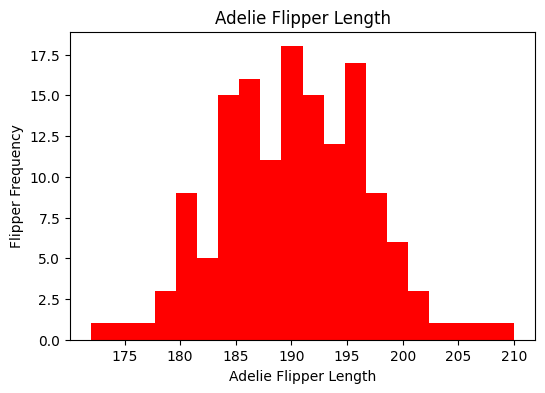

In [46]:
plt.figure(figsize=(6,4))
plt.hist(x = group1_num, bins=20, color='red' )
plt.title('Adelie Flipper Length')
plt.xlabel('Adelie Flipper Length')
plt.ylabel('Flipper Frequency')
plt.show()

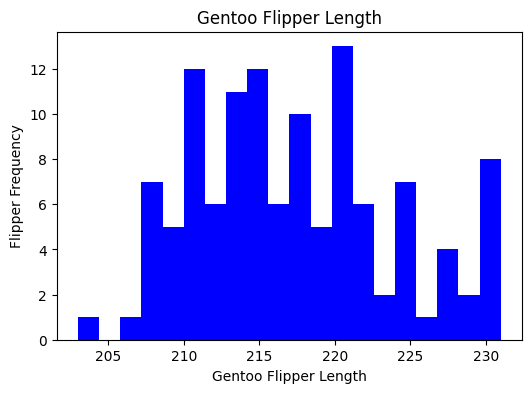

In [47]:
plt.figure(figsize=(6,4))
plt.hist(x = group2_num, bins=20, color='blue' )
plt.xlabel('Gentoo Flipper Length')
plt.ylabel('Flipper Frequency')
plt.title('Gentoo Flipper Length')
plt.show()

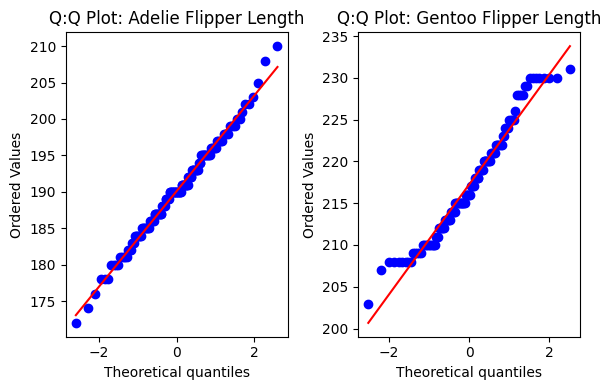

In [ ]:
# Qauntile:Quantile Test for normality
adelie_flipper = data_clean[data_clean['species'] == 'Adelie']['flipper_length_mm']
gentoo_flipper = data_clean[data_clean['species'] ==  'Gentoo']['flipper_length_mm']


import scipy.stats as stats

plt.figure(figsize=(6,4))

plt.subplot(1,2,1)
stats.probplot(adelie_flipper, dist='norm', plot=plt)
plt.title('Q:Q Plot: Adelie Flipper Length')

plt.subplot(1,2,2)
stats.probplot(gentoo_flipper, dist='norm', plot=plt)
plt.title('Q:Q Plot: Gentoo Flipper Length')

plt.tight_layout()
plt.show()

In [80]:
# group aggregates
group_adelie = adelie_flipper.mean()
group_gentoo = gentoo_flipper.mean()


print(f'Mean Adelie Penguin Flipper length is: {group_adelie:.2f}')
print(f'Mean Gentoo Penguin Flipper length is: {group_gentoo:.2f}')

relative_change = ((group_gentoo - group_adelie)/(group_adelie)) *100
print(f'relative change between flippers is: {relative_change:.3f}%')

#adelie_flipper.describe()
#gentoo_flipper.describe().T


Mean Adelie Penguin Flipper length is: 190.10
Mean Gentoo Penguin Flipper length is: 217.24
relative change between flippers is: 14.273%


In [71]:
# Conduct levene test for equal variance
from scipy.stats import levene

leven_stats, pvalue = levene(adelie_flipper, gentoo_flipper)

print(leven_stats)
print(pvalue)

0.5328229132105997
0.4660721153738686


In [74]:
# print shape value
print(adelie_flipper.shape)
print(gentoo_flipper.shape)


(146,)
(119,)


normality test failed 
homogeniety  test passed
Use non-parametric testing because of one failed approach

In [ ]:
# use mannwhitneyu test because assumption for parametric testing failed
from scipy.stats import mannwhitneyu 

# setup the test
mann_statistic, pvaluex = mannwhitneyu(adelie_flipper, gentoo_flipper)

# print statistic and pvalue
print(f'mannwhitney statistic: {mann_statistic:.2f} and pvalue is: {pvaluex}')


mannwhitney statistic: 26.00 and pvalue is: 2.6499765695065895e-44


In [87]:
# Alternatively, you could also use kruskal wallis 
from scipy.stats import kruskal

kstatistic, pvalue = kruskal(adelie_flipper, gentoo_flipper)
print(f'p-value of kruskal wallis is:{pvalue}')

p-value of kruskal wallis is:2.6201682783801785e-44


In [ ]:
# if the assumptions for the test are satisfied, we could use ttest and ztest for analysis
# use ttest to analyze the data

from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(adelie_flipper,gentoo_flipper)
print(f'ttstastic pvlaue is :{p_value}')

ttstastic pvlaue is :5.532793272602216e-97


In [88]:
# use ztest if the criteria was satisfied

from statsmodels.stats.weightstats import ztest

z_statistic, p_value = ztest(adelie_flipper, gentoo_flipper)
print(f' ztest pvlaue: {p_value}')

 ztest pvlaue: 1.3122414584111082e-246
